<a href="https://colab.research.google.com/github/Tawhidrahman292/Roadmap-Docs/blob/main/hwclass8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  # Assuming the uploaded file is your CSV
  data = pd.read_csv(fn)

print('Dataset loaded successfully!')
display(data.head())

Saving Breast_Cancer_Wisconsin_Dataset.csv to Breast_Cancer_Wisconsin_Dataset.csv
User uploaded file "Breast_Cancer_Wisconsin_Dataset.csv" with length 125204 bytes
Dataset loaded successfully!


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [68]:
print("Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)")

# Convert diagnosis to numbers
data['diagnosis_numeric'] = data['diagnosis'].map({'M': 1, 'B': 0})


# Select only the most important features (make it simple!)
important_features = [
    'radius_mean',      # Size of tumor
    'texture_mean',     # Surface texture
    'perimeter_mean',
    'concavity_mean',
    'symmetry_mean',
]


# Create simple dataset
X = data[important_features]  # Patient measurements
y = data['diagnosis_numeric']  # Malignant (1) or Benign (0)

print(f"X (measurements): {X.shape}")
print(f"y (diagnosis): {y.shape}")

Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)
X (measurements): (569, 5)
y (diagnosis): (569,)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)

print(f"Training: {len(X_train)} patients (computer will learn from these)")
print(f"Testing:  {len(X_test)} patients (computer will be tested on these)")

# Show some training examples
print(f"\n Training Examples (Computer learns from these):")
print(X_train.head())

Training: 455 patients (computer will learn from these)
Testing:  114 patients (computer will be tested on these)

 Training Examples (Computer learns from these):
     radius_mean  texture_mean  perimeter_mean  concavity_mean  symmetry_mean
412        9.397         21.68           59.75         0.03735         0.1274
461       27.420         26.27          186.90         0.36350         0.2061
532       13.680         16.33           87.76         0.01752         0.1631
495       14.870         20.21           96.12         0.06824         0.1487
13        15.850         23.95          103.70         0.09938         0.1847


In [64]:
# Create our Skill Morph model
skillmorph_doctor = DecisionTreeClassifier(
    max_depth=6,  # Keep it simple - not too complex
    random_state=20
)

print("Teaching Skill Morph doctor with training data...")
# Train the model
skillmorph_doctor.fit(X_train, y_train)
print("Skill Morph doctor training completed!")

Teaching Skill Morph doctor with training data...
Skill Morph doctor training completed!


In [69]:
print("Now let's see how good our Skill Morph doctor is...")

# Make predictions
predictions = skillmorph_doctor.predict(X_test)

print("Skill Morph doctor made predictions for all test patients!")


# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nSkill Morph Doctor Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

if accuracy > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif accuracy > 0.80:
    print("OK! Our Skill Morph doctor is decent!")
else:
    print("Needs improvement...")

Now let's see how good our Skill Morph doctor is...
Skill Morph doctor made predictions for all test patients!

Skill Morph Doctor Accuracy: 0.939 (93.9%)
GOOD! Our Skill Morph doctor performs well!


Accuracy:  0.94
Precision: 0.98
Recall:    0.88
F1-Score:  0.92


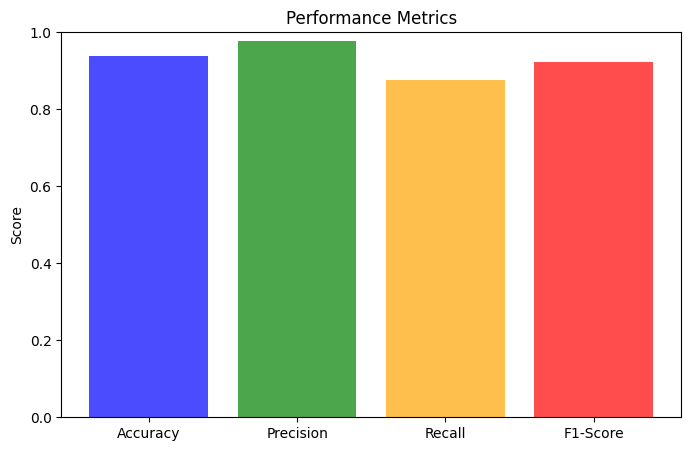

In [70]:
# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print them
print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-Score:  {f1:.2f}")

# Simple bar chart
plt.figure(figsize=(8, 5))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'], alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

Confusion Matrix:
[[65  1]
 [ 6 42]]

Correct: 107
Wrong: 7


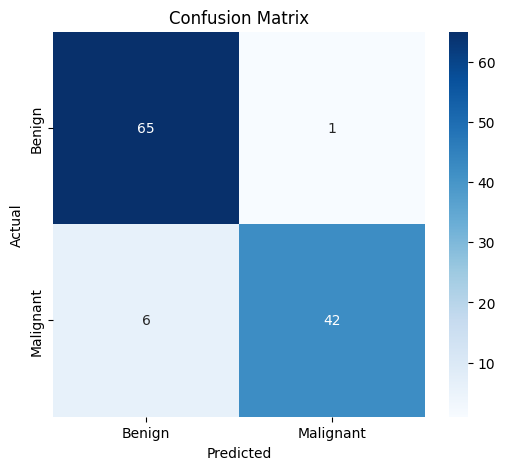

In [71]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print it
print("Confusion Matrix:")
print(cm)
print(f"\nCorrect: {cm[0,0] + cm[1,1]}")
print(f"Wrong: {cm[0,1] + cm[1,0]}")

# Plot it
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()